### Business Case Study: Employee Absenteeism

The database was created with records of absenteeism at work from July 2018 to July 2020 at a courier company.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

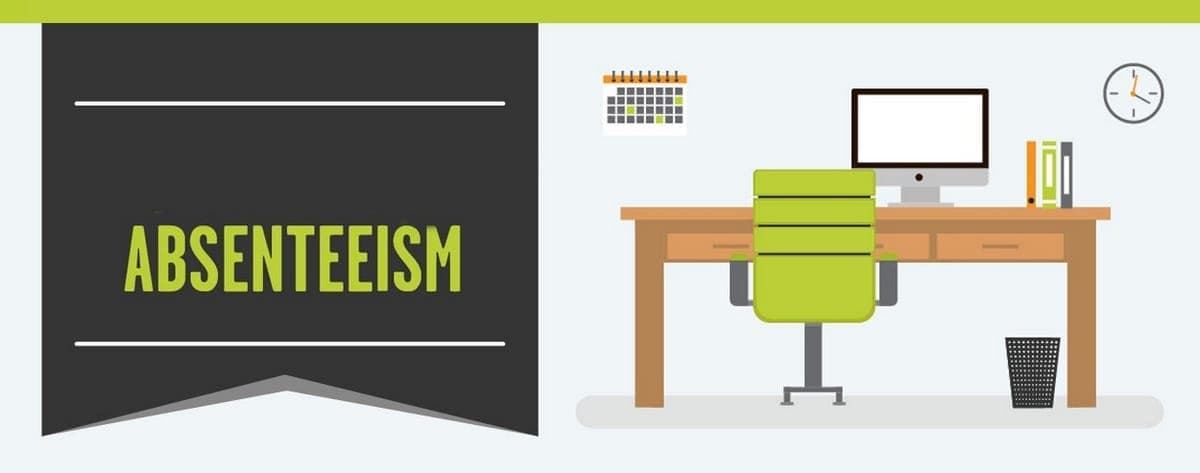

### The business Task
The exercise will address Absenteeism at a company during work time.

## Problem: The problem is that the work environment of today is more:

#### Competitive
#### Managers set unachievable business goals
#### have an elevated risk of becoming unemployed This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

# What is Absenteeism?

Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

Based on what information should we predict whether an employee is expected to be absent or not?

How should we measure absenteeism?

## Purpose of the business exercise:


Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:

How far they live from their workplace.

How many children and pets they have.

Do they have higher education?

In [4]:
data = pd.read_excel('Absenteeism_at_work_Project.xls')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


## 2. Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

The data doesn't have any missing values.

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,737.00,739.00,740.00,740.00,733.00,737.00,737.00,737.00,730.00,...,734.00,730.00,734.00,737.00,736.00,738.00,739.00,726.00,709.00,718.00
mean,18.02,19.19,6.32,3.91,2.54,221.04,29.67,12.57,36.45,271188.86,...,0.05,1.30,1.02,0.57,0.07,0.75,79.06,172.15,26.68,6.98
std,11.02,8.44,3.44,1.42,1.11,66.95,14.85,4.39,6.48,38981.88,...,0.22,0.68,1.09,0.50,0.26,1.32,12.87,6.08,4.29,13.48
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,...,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,284853.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [7]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason for absence==============
Number of unique values: 28
Max: 28.0
Min: 0.0
===============Column: Month of absence==============
Number of unique values: 13
Max: 12.0
Min: 0.0
===============Column: Day of the week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation expense==============
Number of unique values: 24
Max: 388.0
Min: 118.0
===============Column: Distance from Residence to Work==============
Number of unique values: 25
Max: 52.0
Min: 5.0
===============Column: Service time==============
Number of unique values: 18
Max: 29.0
Min: 1.0
===============Column: Age==============
Number of unique values: 22
Max: 58.0
Min: 27.0
===============Column: Work load Average/day ==============
Number of unique values: 38
Max: 378884.0
Min: 205917.0
=====

In [8]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

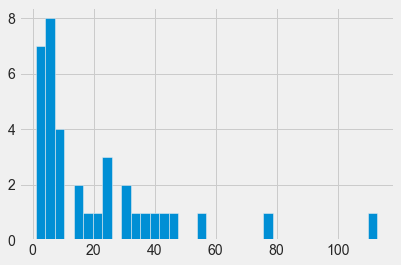

In [9]:
data.ID.value_counts().hist(bins=data.ID.nunique())

ID: individual identification (in this case we have 34 employees) indicates precisely who has been away during working hours. Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

So we are going to drop this column

In [10]:
data.drop('ID', axis=1, inplace=True)

Reason for Absence: We have 28 reason of absence from 0 to 28.

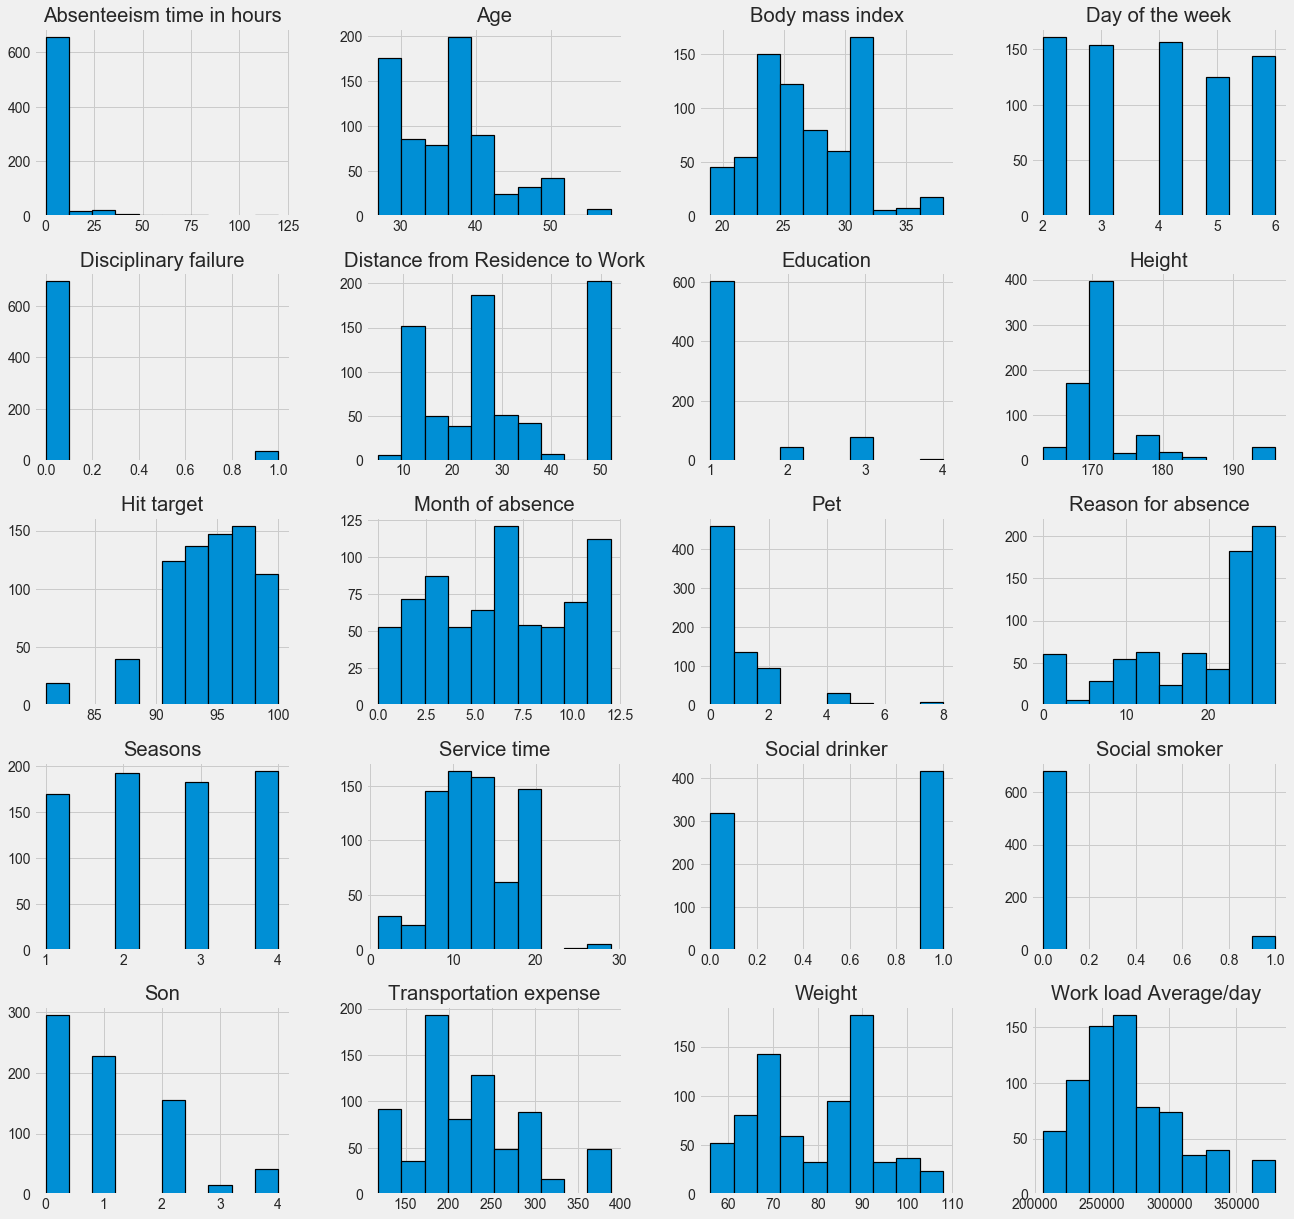

In [11]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [12]:
print(f"{data['Absenteeism time in hours'].value_counts()}")
print(f"{data['Absenteeism time in hours'].value_counts()[0] / data['Absenteeism time in hours'].value_counts()[1]}")

8.00      199
2.00      155
3.00      110
1.00       88
4.00       60
0.00       36
16.00      19
24.00      16
40.00       7
5.00        7
32.00       5
64.00       3
80.00       3
120.00      3
56.00       2
112.00      2
104.00      1
7.00        1
48.00       1
Name: Absenteeism time in hours, dtype: int64
0.4090909090909091


In [13]:
data["Reason for absence"].value_counts()

23.00    149
28.00    110
27.00     69
13.00     55
0.00      43
19.00     40
22.00     37
26.00     33
25.00     31
11.00     26
10.00     25
18.00     21
14.00     19
1.00      16
7.00      15
6.00       8
12.00      8
8.00       6
21.00      6
9.00       4
24.00      3
5.00       3
16.00      3
15.00      2
4.00       2
2.00       1
17.00      1
3.00       1
Name: Reason for absence, dtype: int64

In [15]:
data["Reason for absence"] = data["Reason for absence"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for absence"].value_counts()

Group_4    432
Group_1    232
Group_3     67
Group_2      6
Name: Reason for absence, dtype: int64

In [16]:
data_1 = pd.get_dummies(data, columns=['Reason for absence'])

In [17]:
data_1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Group_1,Reason for absence_Group_2,Reason for absence_Group_3,Reason for absence_Group_4
0,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,4.00,0,0,0,1
1,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,...,0.00,0.00,98.00,178.00,31.00,0.00,1,0,0,0
2,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,97.00,0.00,...,0.00,0.00,89.00,170.00,31.00,2.00,0,0,0,1
3,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,97.00,0.00,...,1.00,0.00,68.00,168.00,24.00,4.00,1,0,0,0
4,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,2.00,0,0,0,1


In [18]:
data_1.dtypes

Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Reason for absence_Group_1           uint8
Reason for absence_Group_2           uint8
Reason for absence_Group_3           uint8
Reason for absence_Group_4           uint8
dtype: obje

In [19]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
Reason for absence_Group_1         0
Reason for absence_Group_2         0
Reason for absence_Group_3         0
Reason for absence_Group_4         0
dtype: int64

In [20]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [21]:
data_1.Education.value_counts()

0    525
1    117
Name: Education, dtype: int64

In [22]:
data_1.Education.isna().sum()

0

In [23]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_Group_1', 'Reason for absence_Group_2',
       'Reason for absence_Group_3', 'Reason for absence_Group_4',
       'Education_1'],
      dtype='object')

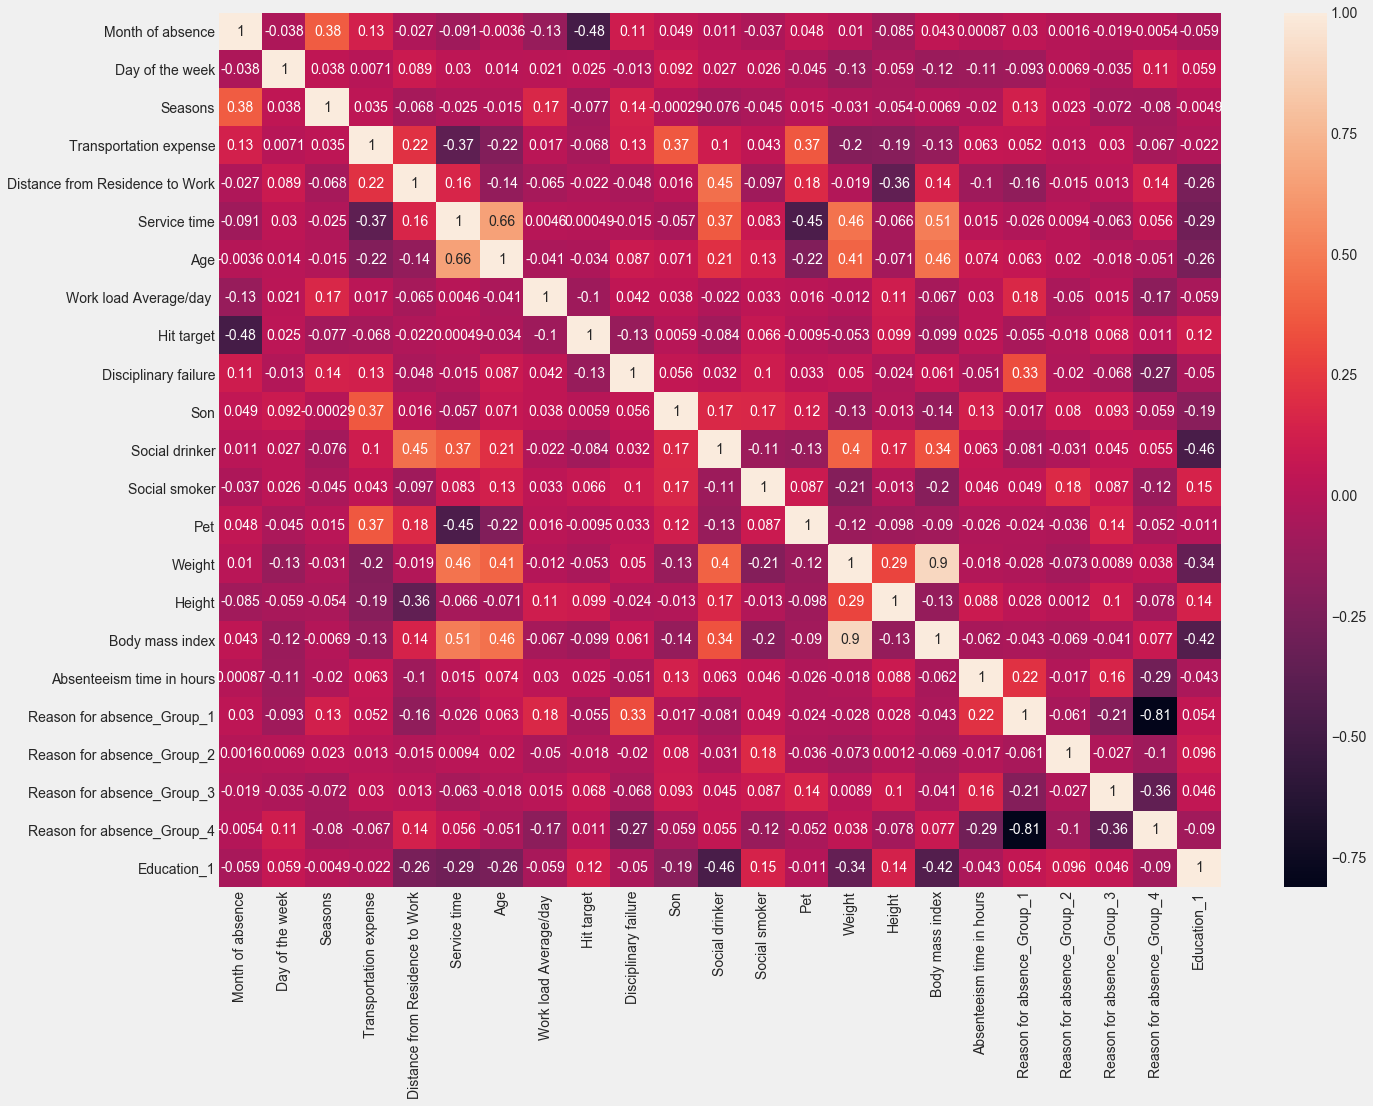

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

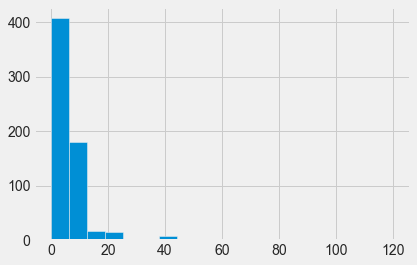

In [25]:
data_2['Absenteeism time in hours'].hist(bins=data_2['Absenteeism time in hours'].nunique())

## 3. Applying machine learning algorthims

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

X = data_2.drop('Absenteeism time in hours', axis=1)
y = np.where(data_2["Absenteeism time in hours"] > data_2["Absenteeism time in hours"].median(), 1, 0)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X shape: (642, 22)
y shape: (642,)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## 3. 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

print("\n=========LOGISTIC REGRESSION============")
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)


=========LOGISTIC REGRESSION============
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[201  49]
 [ 52 147]]
ACCURACY SCORE:
0.7751
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.75      0.78       0.77          0.77
recall      0.80   0.74      0.78       0.77          0.78
f1-score    0.80   0.74      0.78       0.77          0.77
support   250.00 199.00      0.78     449.00        449.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[83 16]
 [41 53]]
ACCURACY SCORE:
0.7047
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.67  0.77      0.70       0.72          0.72
recall     0.84  0.56      0.70       0.70          0.70
f1-score   0.74  0.65      0.70       0.70          0.70
support   99.00 94.00      0.70     193.00        193.00


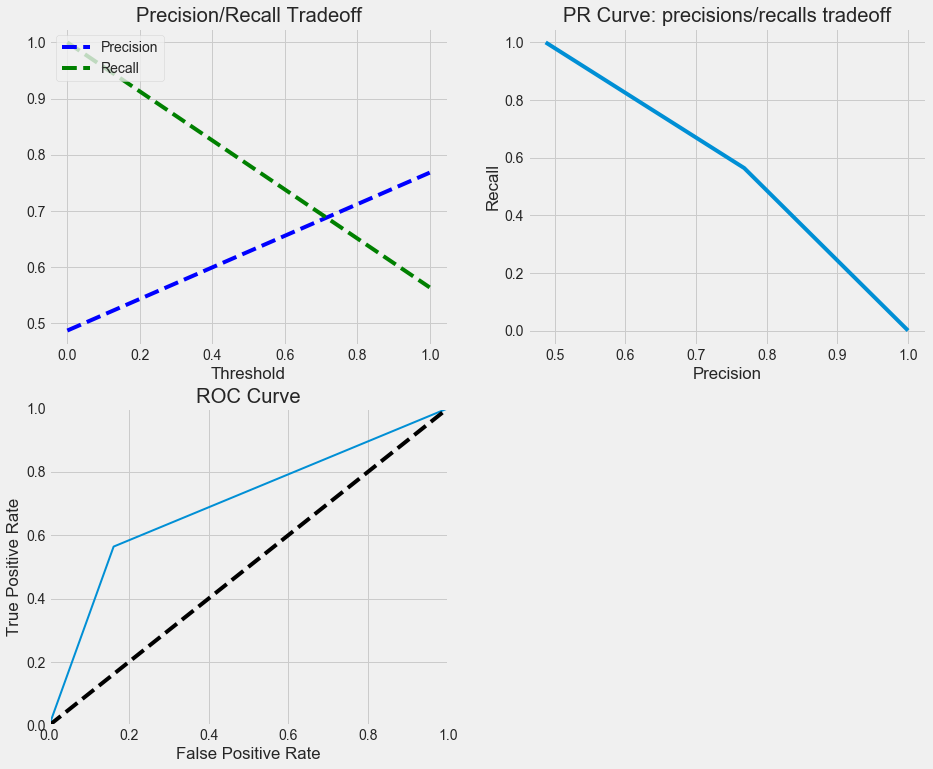

In [29]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [30]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
    },
}

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task. In our case we need to predict if an employee will absent accuratly. so we need to increase

In [31]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Cross-Validation score mean: 73.73% (+/-4.71)


In [32]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(lr_clf.coef_)
summary_table

,Features_name,Coefficients
0,Month of absence,0.21
1,Day of the week,-0.17
2,Seasons,-0.32
3,Transportation expense,0.53
4,Distance from Residence to Work,-0.21
5,Service time,-0.01
6,Age,-0.28
7,Work load Average/day,0.13
8,Hit target,-0.03
9,Disciplinary failure,-1.00


In [33]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_clf.intercept_[0]]
summary_table.sort_index(inplace=True)

In [34]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
18,Reason for absence_Group_1,0.66,1.94
11,Son,0.54,1.72
4,Transportation expense,0.53,1.70
20,Reason for absence_Group_3,0.49,1.63
12,Social drinker,0.32,1.38
1,Month of absence,0.21,1.24
15,Weight,0.17,1.18
8,Work load Average/day,0.13,1.14
19,Reason for absence_Group_2,0.00,1.00
17,Body mass index,0.00,1.00


## 3. 2. Random Forest

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


print("\n=========RANDOM FOREST============")
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)


=========RANDOM FOREST============
Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 62.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 65.3min finished


Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[240  10]
 [ 17 182]]
ACCURACY SCORE:
0.9399
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.95      0.94       0.94          0.94
recall      0.96   0.91      0.94       0.94          0.94
f1-score    0.95   0.93      0.94       0.94          0.94
support   250.00 199.00      0.94     449.00        449.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[85 14]
 [30 64]]
ACCURACY SCORE:
0.7720
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.74  0.82      0.77       0.78          0.78
recall     0.86  0.68      0.77       0.77          0.77
f1-score   0.79  0.74      0.77       0.77          0.77
support   99.00 94.00      0.77     193.00        193.00


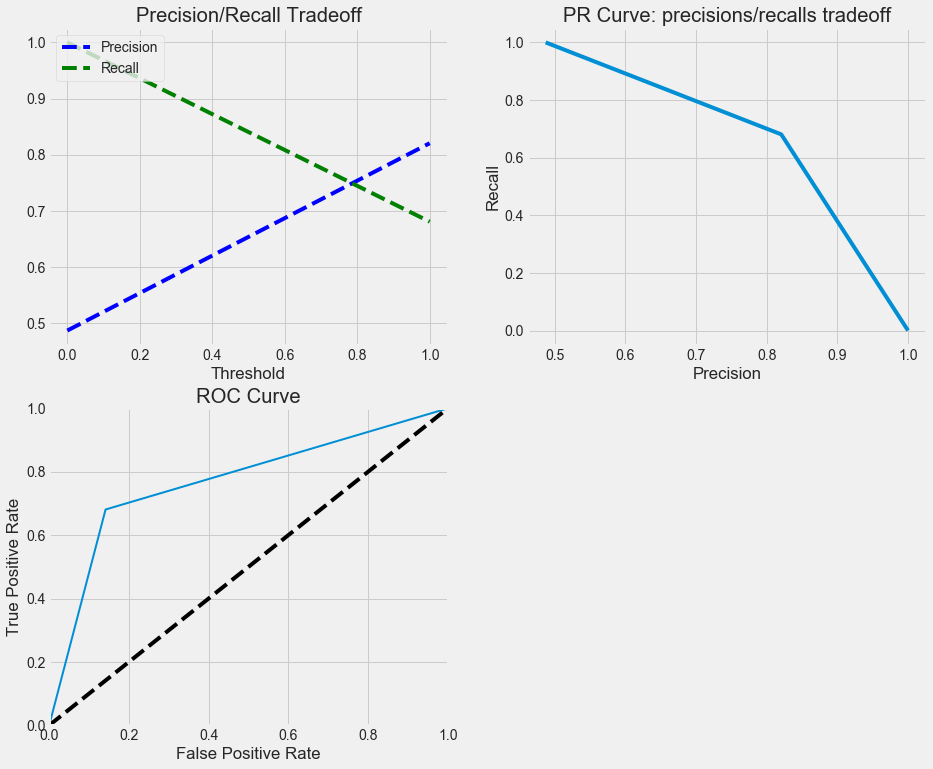

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [39]:
scores_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

## 3. 3. XGBoost

In [40]:
import xgboost as xgb

n_estimators = [50, 100, 250]
max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
min_child_weight = [1, 2, 3, 4]
subsample = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bytree = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bynode = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bylevel = [0.5, 0.75, 0.85, 0.9, 1]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth,
    'learning_rate' : learning_rate, 
    'min_child_weight' : min_child_weight, 
#     'booster' : booster, 
    'base_score' : base_score,
    'subsample': subsample,
#     'colsample_bytree': colsample_bytree,
#     'colsample_bynode': colsample_bynode,
#     'colsample_bylevel': colsample_bylevel,
}

xgb_clf = xgb.XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'f1',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 7500 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5820 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 7180 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 9280 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 10720 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 15448 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 18348 tasks    

Best paramters: {'base_score': 0.2, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 250, 'subsample': 0.75}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[219  31]
 [ 43 156]]
ACCURACY SCORE:
0.8352
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.84   0.83      0.84       0.84          0.84
recall      0.88   0.78      0.84       0.83          0.84
f1-score    0.86   0.81      0.84       0.83          0.83
support   250.00 199.00      0.84     449.00        449.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[86 13]
 [31 63]]
ACCURACY SCORE:
0.7720
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.74  0.83      0.77       0.78          0.78
recall     0.87  0.67      0.77       0.77          0.77
f1-score   0.80  0.74      0.77       0.77          0.77
support   99.00 94.00      0.77     193.00        193.00


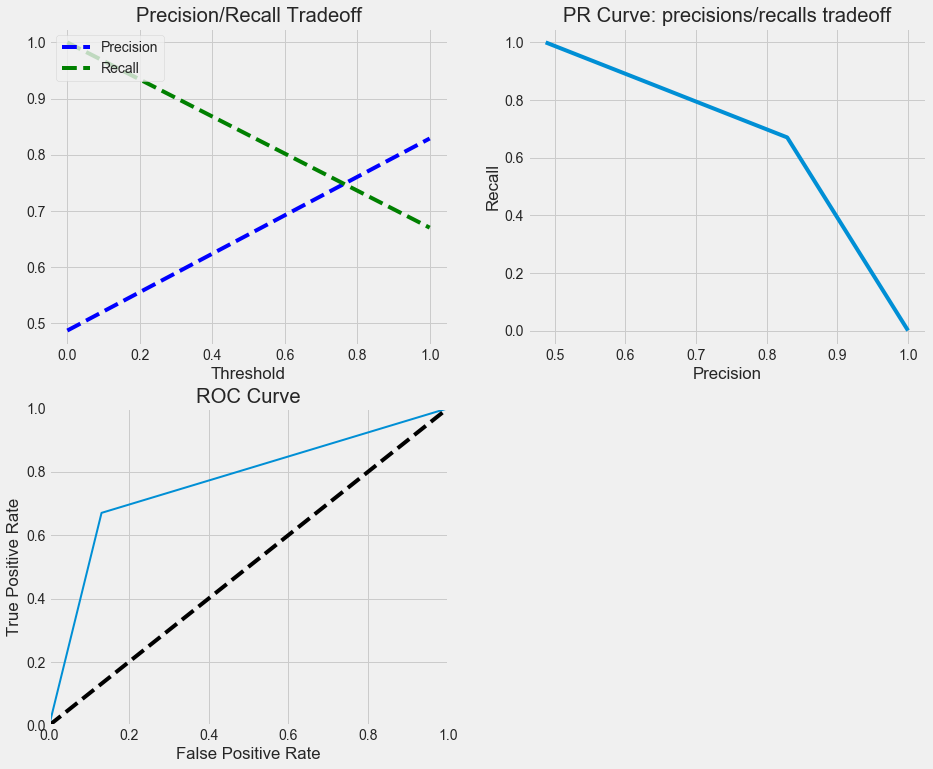

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [42]:
scores_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

## 3. 4. Support Vector Machine

In [43]:
from sklearn.svm import SVC

param_grid = {'C': [60, 70, 75, 65 ], 
              'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007], 
              'kernel': ['rbf', 'poly', 'linear']} 

svm_cv = GridSearchCV(SVC(), param_grid, scoring='accuracy', verbose=1, cv=3)
svm_cv.fit(X_train, y_train)

best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'C': 65, 'gamma': 0.0009, 'kernel': 'rbf'}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[200  50]
 [ 48 151]]
ACCURACY SCORE:
0.7817
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.75      0.78       0.78          0.78
recall      0.80   0.76      0.78       0.78          0.78
f1-score    0.80   0.76      0.78       0.78          0.78
support   250.00 199.00      0.78     449.00        449.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[83 16]
 [38 56]]
ACCURACY SCORE:
0.7202
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.69  0.78      0.72       0.73          0.73
recall     0.84  0.60      0.72       0.72          0.72
f1-score   0.75  0.67      0.72       0.71          0.72
support   99.00 94.00      0.72     193.00        193.00


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.1min finished


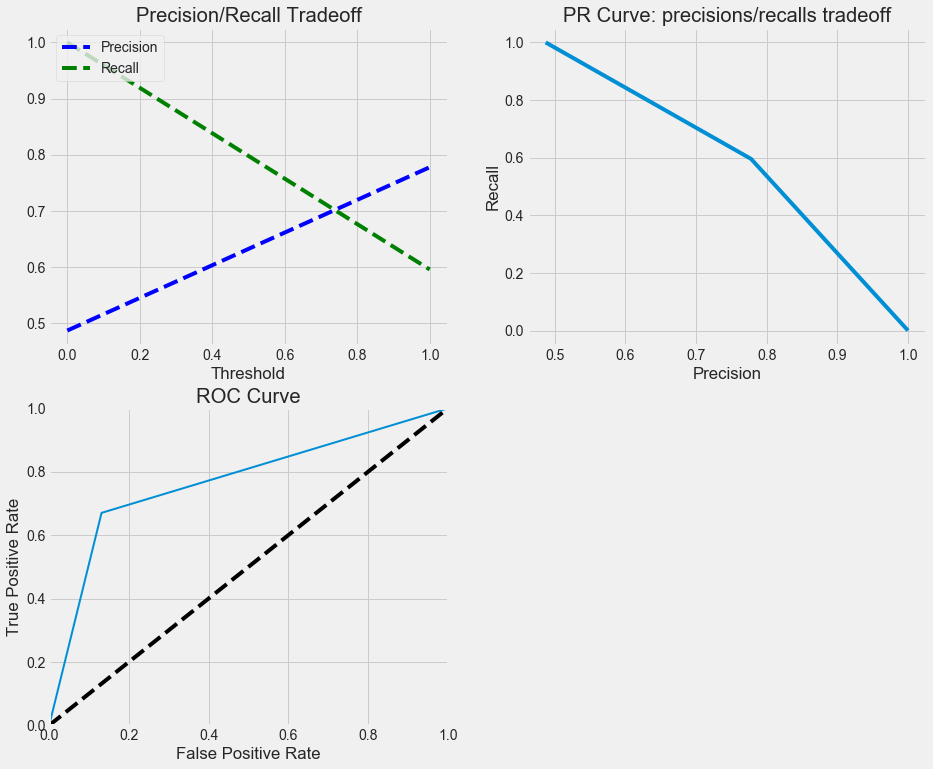

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [45]:
scores_dict['Support Vector Machine'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    }

## 4. Comparing Machine Learning models

Area Under the Curve score (AUC) is good way to compare classifiers. A perfect classifier AUC will have a ROC AUC equal to 1.

In [46]:
from sklearn.metrics import roc_auc_score

ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf, 
    'Support Vector Machine': svm_clf
}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION roc_auc_score: 0.701
RANDOM FOREST roc_auc_score: 0.770
XGBOOST roc_auc_score: 0.769
SUPPORT VECTOR MACHINE roc_auc_score: 0.717


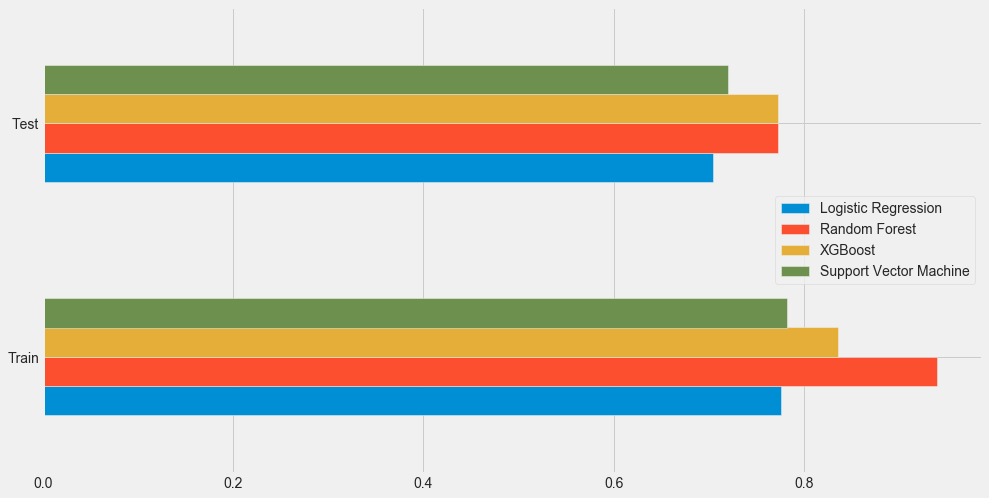

In [47]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

## Save the models

In [4]:
import pickle

with open('Xgb_clf', 'wb') as file:
    pickle.dump(xgb_clf, file)

with open('Rf_clf', 'wb') as file:
    pickle.dump(rf_clf, file)

NameError: name 'xgb_clf' is not defined